## Ref


### orginal idea, code and data in this article
https://towardsdatascience.com/predictive-customer-analytics-part-ii-the-customer-acquisition-process-sample-use-case-59a52bc8796

### data source
https://github.com/RyanSydney/PredictiveCustomerAnalytics/blob/master/browsing.csv

Rewrite : Xinyu Max Liu (xinyulrsm@gmail.com)


### background (from the article)
"We have on-line sales rep ready to engage our website visitors, and entice customers to buy our products. But we typically have so many visitors, and most of them are window shoppers. We want to offer our sales rep through chat, only to visitors who are serious about buying on that given day. We don’t want to waste our sales rep time."


### goal

Predict customer's propensity to buy.

### import python libraries

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
import sklearn
from sklearn.model_selection  import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

### load data

In [2]:
url = "https://raw.github.com/RyanSydney/PredictiveCustomerAnalytics/master/browsing.csv"
df = pd.read_csv(url)
df.head()

,SESSION_ID,IMAGES,REVIEWS,FAQ,SPECS,SHIPPING,BOUGHT_TOGETHER,COMPARE_SIMILAR,VIEW_SIMILAR,WARRANTY,SPONSORED_LINKS,BUY
0,1001,0,0,1,0,1,0,0,0,1,0,0
1,1002,0,1,1,0,0,0,0,0,0,1,0
2,1003,1,0,1,1,1,0,0,0,1,0,0
3,1004,1,0,0,0,1,1,1,0,0,0,0
4,1005,1,1,1,0,1,0,1,0,0,0,0


### feature engineering 

it is simple in this case, it could be really time consuming in some cases

In [3]:
df.corr()['BUY']

SESSION_ID         0.026677
IMAGES             0.046819
REVIEWS            0.404628
FAQ               -0.095136
SPECS              0.009950
SHIPPING          -0.022239
BOUGHT_TOGETHER   -0.103562
COMPARE_SIMILAR    0.190522
VIEW_SIMILAR      -0.096137
WARRANTY           0.179156
SPONSORED_LINKS    0.110328
BUY                1.000000
Name: BUY, dtype: float64

### data cleaning / selection for the model

In [4]:
predictors = df[['REVIEWS','BOUGHT_TOGETHER','COMPARE_SIMILAR','WARRANTY','SPONSORED_LINKS']]

targets = df.BUY

### split data to train and test set

In [5]:
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=0.3)

### select model

In [6]:
from sklearn.naive_bayes import GaussianNB

classifier=GaussianNB()

classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

predictions_proba = classifier.predict_proba(pred_test)

#Analyze accuracy of predictions



### model evaluation

In [7]:
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[74, 19],
       [25, 32]])

In [8]:
## Accuracy
sklearn.metrics.accuracy_score(tar_test, predictions)

0.7066666666666667

In [9]:
## Recall
sklearn.metrics.recall_score(tar_test, predictions)

0.5614035087719298

In [10]:
## F1 
sklearn.metrics.f1_score(tar_test, predictions)

0.5925925925925926

In [11]:
## ROC curve and AUC
fpr, tpr, thresholds = metrics.roc_curve(tar_test.values, predictions_proba[:,1], pos_label=1)
auc = metrics.auc(fpr, tpr)
auc

0.8082437275985662

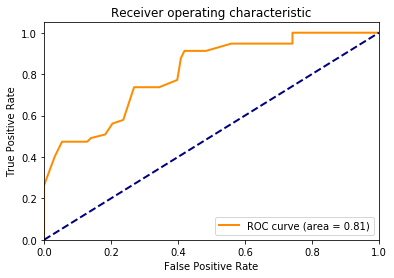

In [12]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [13]:
## apply this model to customer

In [14]:
browsing_data = np.array([0,0,0,0,0]).reshape(1, -1)

print("New visitor: propensity :",classifier.predict_proba(browsing_data)[:,1])

New visitor: propensity : [0.06137148]


In [15]:
browsing_data = np.array([0,0,1,0,0]).reshape(1, -1)

print("After checking similar products: propensity :",classifier.predict_proba(browsing_data)[:,1] )

After checking similar products: propensity : [0.11711726]


In [16]:
browsing_data = np.array([1,0,1,0,0]).reshape(1, -1)

print("After checking reviews: propensity :",classifier.predict_proba(browsing_data)[:,1] )

After checking reviews: propensity : [0.59120132]


### in this artile, the author said: 
"It shoots up to 50+%. We can have a threshold for when we want to offer chat. We can keep checking this probability against that threshold to see if we want to popup a chat window."